In [85]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import datetime


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values
print(df_resumen['FECHA DE PAGO '].isnull().sum())
print(len(df_resumen['FECHA DE PAGO ']))

969
7886


In [86]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_numeros = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO ","SUBTOTAL","PARTIDA PRESUPUESTAL"], how='all')
df_numeros = df_numeros[~df_numeros['FECHA DE PAGO '].apply(lambda x: isinstance(x, datetime.time))]
df_numeros.loc[df_numeros['FECHA DE PAGO '] < 0, 'FECHA DE PAGO '] = np.nan
print(df_numeros['FECHA DE PAGO '].isnull().sum())

# Asegurar que los datos numéricos estén en el formato correcto
df_numeros["FECHA DE PAGO "]=df_numeros["FECHA DE PAGO "].fillna(method="bfill")
df_numeros = df_numeros[pd.to_numeric(df_numeros['FECHA DE PAGO '], errors='coerce').notna()]


df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]
cuentas=df_numeros["PARTIDA PRESUPUESTAL"].unique()
cuentas.sort()
cuentas=cuentas[:-9]
df_numeros=df_numeros[df_numeros['PARTIDA PRESUPUESTAL'].isin(cuentas)]
#df_numeros=df_numeros.loc[df_numeros["Valida"] != "Balance", :]
#df_numeros["FECHA DE PAGO "]=df_numeros["FECHA DE PAGO "]-df_numeros["FECHA DE PAGO "].min()
#df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] >= 0, :]
df_numeros = df_numeros.dropna(subset=['TOTAL'])
df_numeros = df_numeros.dropna(subset=['SUBTOTAL'])
df_numeros = df_numeros.dropna(subset=['PARTIDA PRESUPUESTAL'])


display(df_numeros)
#np.sum(df_numeros["SUBTOTAL"])
cuentas

987


,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.0,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.0
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.0,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.0
5,N004,0005,1122-005,2.0,6100,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,3.0,NaN,37.0,...,1122-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45131.0
6,N005,0006,1101-007,3.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,44.0,...,1101-007,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.0
7,N006,0007,1107-005,4.0,6140,Personas Físicas con Actividades Empresariales...,Personas Físicas con Actividades Empresariales...,4.0,NaN,44.0,...,1107-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328,NaN,NaN,1640-009,4614.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1640-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7329,NaN,NaN,2080-003,4614.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2080-003,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7330,NaN,NaN,2080-003,4614.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2080-003,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7333,NaN,NaN,7003-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7003-004,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array(['1101-005', '1101-006', '1101-007', ..., '7230-003', '7230-004',
       '7230-005'], dtype=object)

In [87]:
print(len(df_resumen['FECHA DE PAGO ']))
# Resumen general
print(df_numeros.describe())
#df_numeros = df_numeros.dropna(subset=['Valida'])

# Departamentos únicos
len(df_numeros["Valida"].unique())

#len(df_limpio["Valida"].unique())

7886
       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        7072.000000  5951.000000         988.000000   
mean         2332.882070   281.180474         248.070557   
std          1434.250361   285.570895          72.194891   
min             0.000000     0.000000        -190.000000   
25%           889.750000    41.000000         204.498264   
50%          2340.500000   168.000000         271.592627   
75%          3557.250000   454.000000         283.723652   
max          4614.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           7161.000000  6304.000000  7165.000000  7.173000e+03   
mean             507.808546    38.718750  2109.101745  1.875237e+04   
std              415.030999    62.700796  1274.705600  9.546488e+04   
min                1.000000     0.000000     3.000000 -3.281300e+04   
25%              160.000000     1.000000  1001.000000  2.703600e+02   
50%              364.000000 

1051

In [88]:
# Crear la nueva columna tomando solo la parte antes del guion
df_numeros['Cuentasb'] = df_numeros['PARTIDA PRESUPUESTAL'].str.split('-').str[0]
df_numeros['Cuentasd2'] = df_numeros['PARTIDA PRESUPUESTAL'].str[:2]+"00"
print(len(df_numeros["Cuentasd2"].unique()))
print(df_numeros["PARTIDA PRESUPUESTAL"].isna().sum())
print(df_numeros['Cuentasd2'])

34
0
3       7000
4       1100
5       1100
6       1100
7       1100
        ... 
7328    1600
7329    2000
7330    2000
7333    7000
7335    7000
Name: Cuentasd2, Length: 7173, dtype: object


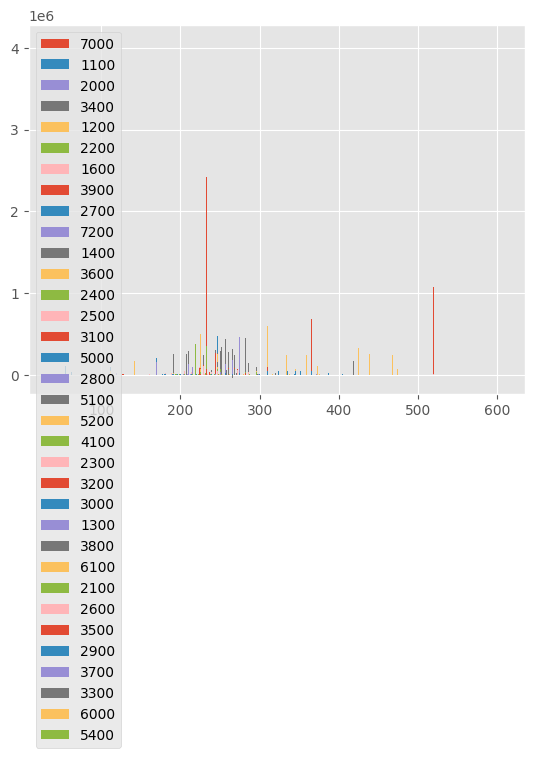

In [89]:
departamentos = list(df_numeros["Cuentasd2"].unique())
#departamentos.remove("Ba00")



for i in departamentos:
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'SUBTOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    plt.bar(semanas,coso,label=i)
    #print(coso)
plt.legend()

plt.show()

In [67]:
sumas=[]
for i in departamentos:
    e = sum(list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'SUBTOTAL']))
    sumas.append(e)
pie=pd.DataFrame({'sumas':sumas,'departamentos':departamentos})
pie.sort_values(by="sumas")

,sumas,departamentos
33,3.500000e+04,5400
28,2.990000e+05,3500
29,3.631832e+05,2900
31,4.082000e+05,3300
24,6.569780e+05,3800
30,8.964000e+05,3700
20,9.511906e+05,2300
13,1.098245e+06,2500
16,1.159295e+06,2800
22,1.170277e+06,3000


In [68]:
fig, ax = plt.subplots()
ax.pie(pie['sumas'], labels=pie['departamentos'])

([<matplotlib.patches.Wedge at 0x1b2519fe450>,
 [Text(1.0504873477497363, 0.3263071133422079, '7000'),
  Text(0.7363152553978739, 0.8172146870121485, '1100'),
  Text(0.35794603554109183, 1.040132027985109, '2000'),
  Text(-0.14542558292651106, 1.0903446243415358, '3400'),
  Text(-0.6643142965088558, 0.8767476920151797, '1200'),
  Text(-0.8687534658451267, 0.6747350706626123, '2200'),
  Text(-0.9145281570001892, 0.6112595602964729, '1600'),
  Text(-1.0025984231997935, 0.4525443644520256, '3900'),
  Text(-1.074139475880428, 0.23711682005990173, '2700'),
  Text(-1.0930244952986468, 0.123682871397533, '7200'),
  Text(-1.066546406589819, -0.26921880058856423, '1400'),
  Text(-0.8030257596130166, -0.7517643443246946, '3600'),
  Text(-0.5418789471157354, -0.9572707071005266, '2400'),
  Text(-0.3944156224139294, -1.0268574958560865, '2500'),
  Text(-0.07720999123160138, -1.0972869347868934, '3100'),
  Text(0.3405514773667353, -1.0459563524656916, '5000'),
  Text(0.48442367980476686, -0.9875898

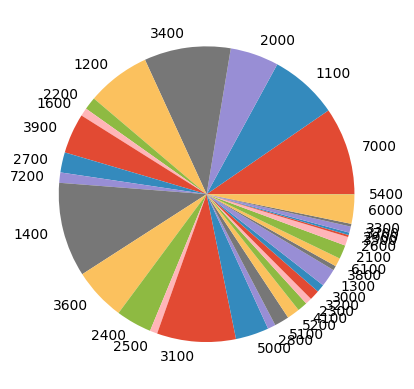

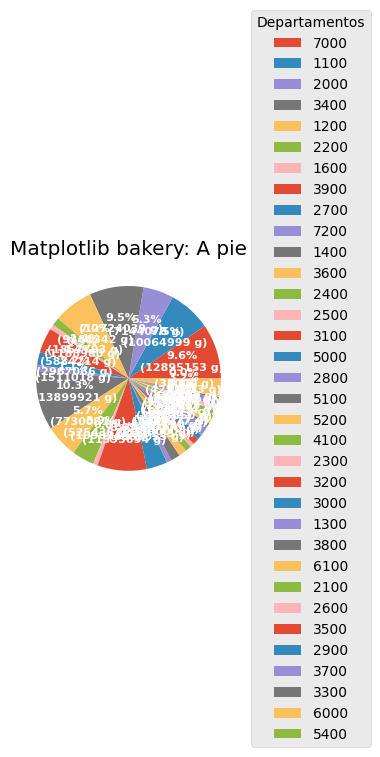

In [69]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))




def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(pie["sumas"], autopct=lambda pct: func(pct, pie["sumas"]),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie["departamentos"],
          title="Departamentos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [105]:
# Agrupar por departamentos y subdepartamentos
agrupado = df_numeros.groupby(["Cuentasb", "Subdepartamento"])["TOTAL"].sum().reset_index()

# Obtener lista de departamentos
departamentos = agrupado["Cuentasd2"].unique()

# Crear gráficos de pastel para cada departamento
fig, axes = plt.subplots(nrows=len(departamentos), figsize=(6, len(departamentos) * 3))

for idx, departamento in enumerate(departamentos):
    subdatos = agrupado[agrupado["Cuentasd2"] == departamento]

    ax = axes[idx] if len(departamentos) > 1 else axes
    wedges, texts, autotexts = ax.pie(subdatos["TOTAL"], 
                                      labels=subdatos["Subdepartamento"], 
                                      autopct=lambda pct: f"{pct:.1f}%\n({int(np.round(pct/100.*np.sum(subdatos['TOTAL'])))} g)",
                                      textprops=dict(color="w"))

    ax.set_title(f"Departamento: {departamento}")
    plt.setp(autotexts, size=8, weight="bold")

plt.tight_layout()
plt.show()

KeyError: 'Subdepartamento'

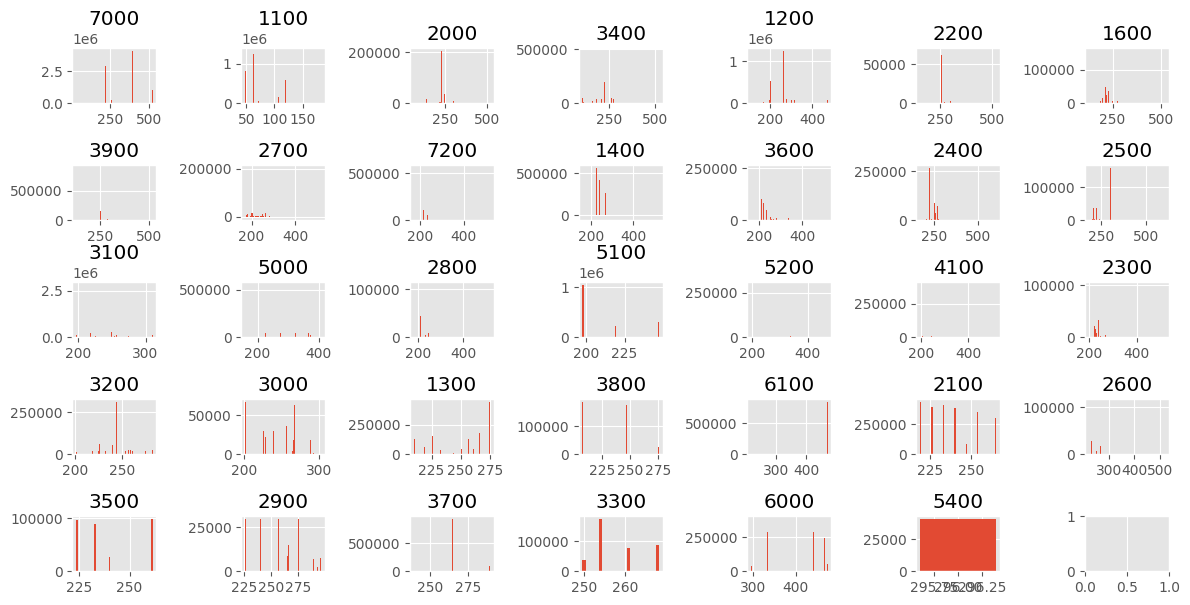

In [70]:
fig, axes = plt.subplots(5, 7, figsize=(12, 6))  # Crear figura con subgráficos


for ax, i in zip(axes.flat, departamentos):
    #otra.loc[otra["UNIDAD ESP."] == i, 'GASTO']
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    ax.bar(semanas,coso,label=i)
    ax.set_title(i)  # Opcional: título con el nombre del departamento

plt.tight_layout()  # Ajusta los gráficos para evitar superposición
plt.show()

In [97]:
df_numeros.sort_values('FECHA DE PAGO ', ascending=True, inplace=True)

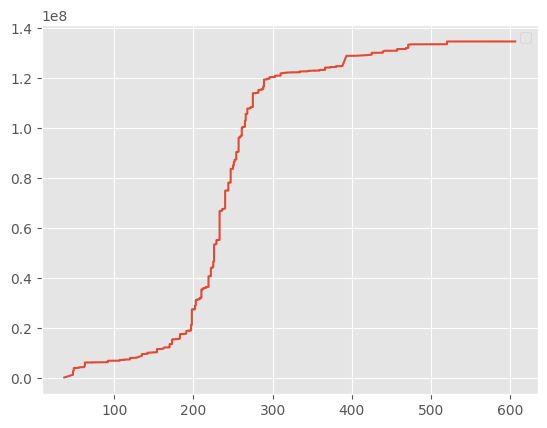

In [72]:
import numpy as np
acumulado=np.cumsum(df_numeros["SUBTOTAL"])
#semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
plt.plot(df_numeros["FECHA DE PAGO "],acumulado)
    #print(coso)
plt.legend()

plt.show()

In [94]:
M_gastos=df_numeros.copy()
M_gastos.sort_values('SUBTOTAL', ascending=False, inplace=True)
M_gastos=M_gastos.head(5)

In [96]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(M_gastos, x="FECHA DE PAGO ", y="SUBTOTAL", title="Gatos acumulado")
#fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Line(x=df_numeros["FECHA DE PAGO "], y=acumulado, name="Acumulado"))
fig.show()

c:\Users\ultim\anaconda3\envs\IDM\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [59]:
df_budget = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Cost Report")
df_budget.columns=["A","B","C","D","E","F","PARTIDA PRESUPUESTAL","H","I","J","K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U","V", "W", "X", "Y", "Z", "AA"]
#df_budget.rename(columns={'Valida': 'Unnamed: 5'}, inplace=True)
print(len(df_budget["PARTIDA PRESUPUESTAL"]))
df_unida = df_numeros.merge(df_budget, on='PARTIDA PRESUPUESTAL')
df_unida = df_unida.dropna(subset=['C'])
#df_budget.columns.values
etapas=df_unida["A"].unique()
#etapas.remove("TIPO")
minimos=list(df_unida.groupby("A")["FECHA DE PAGO "].min())
maximos=list(df_unida.groupby("A")["FECHA DE PAGO "].max())
colormap = plt.cm.plasma  # Cambia 'viridis' por otro colormap como 'plasma', 'cividis', etc.
ocolormap = plt.cm.viridis
num_colores = len(minimos)  # Número de colores que deseas
colores = [colormap(i) for i in np.linspace(0, 1, num_colores)]
ocolores = [ocolormap(i) for i in np.linspace(0, 1, num_colores)]
print(df_unida.groupby("A")["FECHA DE PAGO "].min())
print(df_unida.groupby("A")["FECHA DE PAGO "].max())

#df_unida["C"].unique()
#etapas

2492
Series([], Name: FECHA DE PAGO , dtype: int64)
Series([], Name: FECHA DE PAGO , dtype: int64)


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit as logistic
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)
df_numeros["FECHA DE PAGO "] = pd.to_numeric(df_numeros["FECHA DE PAGO "], errors='coerce')
df_numeros = df_numeros.dropna(subset=["FECHA DE PAGO "])
x = df_numeros["FECHA DE PAGO "].values
x_scaled = (x - x.mean()) / x.std()

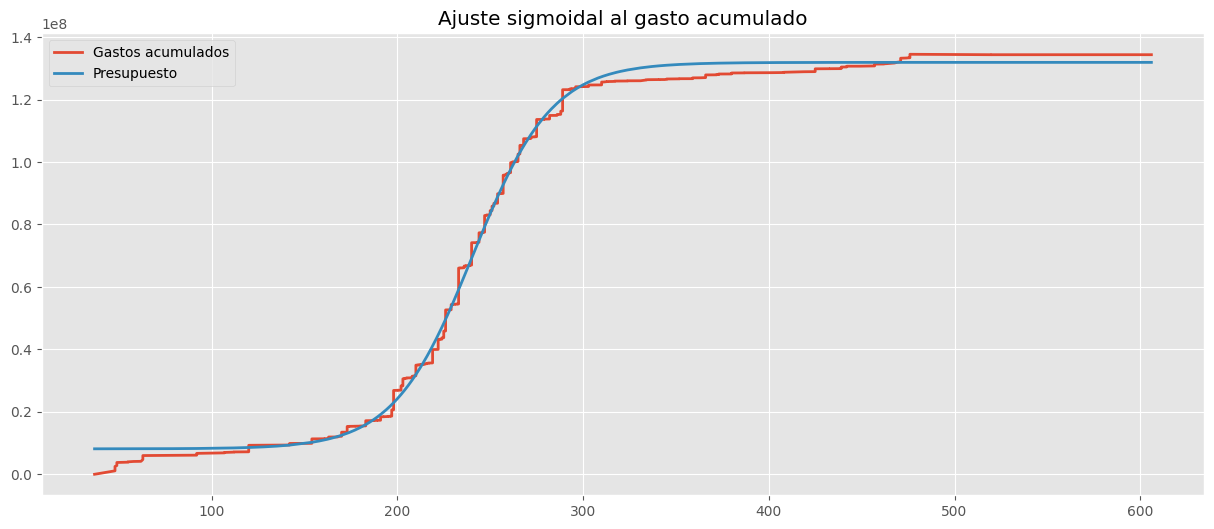

In [61]:
L_init = acumulado.max()
x0_init = 0  # porque lo escalaste
k_init = 1
b_init = acumulado.min()
p0 = [L_init, x0_init, k_init, b_init]
popt, pcov = curve_fit(sigmoid, x_scaled, acumulado, p0, method='dogbox')
y_pred = sigmoid(x_scaled, *popt)
#y_truth = logistic(df_numeros["FECHA DE PAGO "], L=L_estimate, x_0=0, k=1)


fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
for i in range(len(minimos)):
    ax.axvspan(minimos[i], maximos[i],color=colores[i],label=etapas[i],alpha=.4,edgecolor=ocolores[i])
ax.legend()
plt.show()

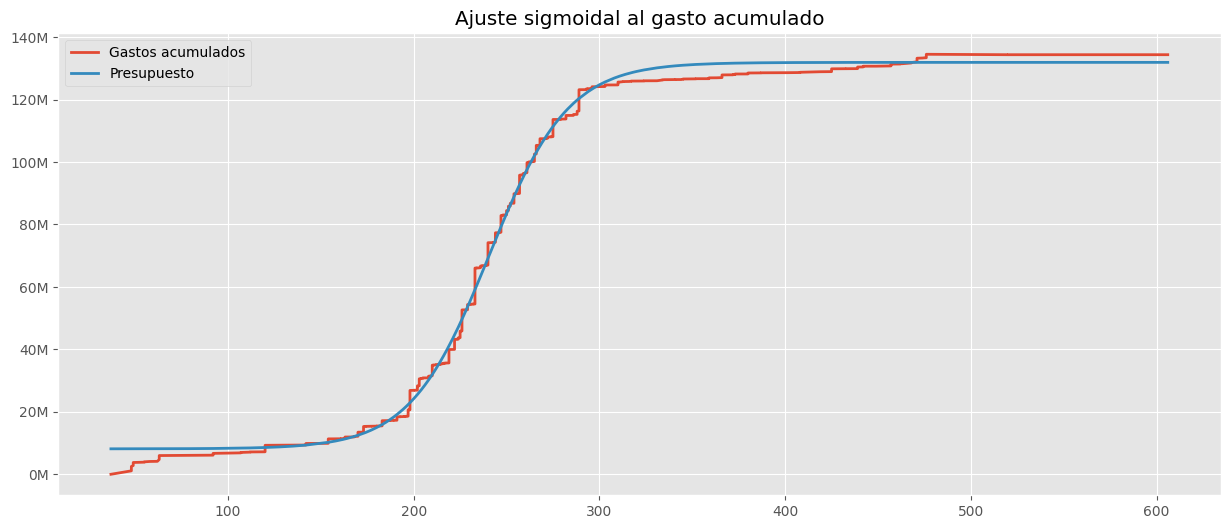

In [62]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(15, 6))
def formato_millones(x, pos):
    return f'{int(x/1000000)}M'
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
ax.yaxis.set_major_formatter(FuncFormatter(formato_millones))
for i in range(len(minimos)):
    ax.axvline(x=minimos[i], color=colores[i], linestyle=":",label=etapas[i],linewidth=2)
    ax.axvline(x=maximos[i], color=colores[i], linestyle="--",label=etapas[i],linewidth=2)
ax.legend()

plt.show()

In [28]:
acumulado.max()

127549599.60400023

In [63]:
df_numeros.groupby("PARTIDA PRESUPUESTAL")["SUBTOTAL"].sum().sum()

134371982.764